## Cuaderno de análisis descriptivo
### National Health and Nutrition Examination Survey (NHANES) 2015-2016

Este cuaderno demuestra algunos análisis descriptivos utilizando diferentes bibliotecas de python en los datos de NHANES 2015-2016. Revisa el [libro de códigos del NHANES](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#Codebook) para una descripción de las variables.

In [ ]:
# Crea una lista de archivos en el directorio de Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd My\ Drive/Colab/Portfolio/NHANES\ 2015-2016
%ls

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

da = pd.read_csv("nhanes_2015_2016.csv")

# Imprime una lista de columnas del dataframe
print(da.columns)
da.shape

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')


(5735, 28)

Podemos obtener algunos insights del conjunto de datos sobre las variables cuantitativas edad ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), peso ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)), altura ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) e índice de masa corporal ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) utilizando `describe()`.

In [3]:
# Describe las variables RIDAGEYR, BMXWT, BMXHT, BMXBMI
da[["RIDAGEYR", "BMXWT", "BMXHT", "BMXBMI"]].describe()

,RIDAGEYR,BMXWT,BMXHT,BMXBMI
count,5735.000000,5666.000000,5673.000000,5662.000000
mean,48.052310,81.342676,166.142834,29.382197
std,18.431011,21.764409,10.079264,7.095921
min,18.000000,32.400000,129.700000,14.500000
25%,32.000000,65.900000,158.700000,24.300000
50%,48.000000,78.200000,166.000000,28.300000
75%,63.000000,92.700000,173.500000,33.000000
max,80.000000,198.900000,202.700000,67.300000


Podemos ver que la media de edad de este conjunto de datos es de $\pm$ 48,1 años, con una desviación estándar de 18.4 años, con un mínimo de 18 años y un máximo de 80 años. También podemos ver los valores del primer y tercer cuartil para la edad ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)).

Los parámetros mencionados anteriormente también se pueden ver para el peso ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)), la altura ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) y el índice de masa corporal ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)).

También podemos mostrar estos parámetros descriptivos para las variables mencionadas con un diagrama de caja, utilizando la librería seaborn.

[Text(0.5, 1.0, 'Boxplot of RIDAGEYR, BMXWT, BMXHT, BMXBMI')]

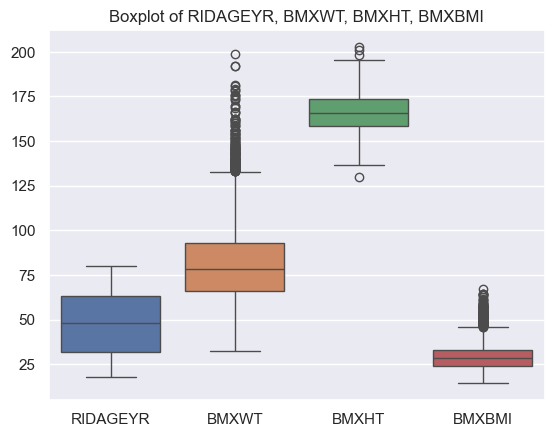

In [4]:
sns.set_theme()
sns.boxplot(data=da.loc[:, ["RIDAGEYR", "BMXWT", "BMXHT", "BMXBMI"]]).set(title='Boxplot of RIDAGEYR, BMXWT, BMXHT, BMXBMI')

Podemos crear un diagrama de caja utilizando la librería plotly, que puede mostrar información adicional al pasar el cursor por encima. Note cómo al establecer `boxmean = "sd"` obtenemos la media y también la desviación estándar para esa variable específica.

In [5]:
# Extrae una lista de objetos
da_RIDAGEYR = da["RIDAGEYR"].values.tolist()
da_BMXWT = da["BMXWT"].values.tolist()
da_BMXHT = da["BMXHT"].values.tolist()
da_BMXBMI = da["BMXBMI"].values.tolist()

# Crea un diagrama de caja para las variables RIDAGEYR, BMXWT, BMXHT, BMXBMI
dataset_box = go.Figure()

dataset_box.add_trace(go.Box(
    y=da_RIDAGEYR,
    name="RIDAGEYR",
    marker_color="blue",
    boxmean="sd"
))

dataset_box.add_trace(go.Box(
    y=da_BMXWT,
    name="BMXWT",
    marker_color="orange",
    boxmean=True
))

dataset_box.add_trace(go.Box(
    y=da_BMXHT,
    name="BMXHT",
    marker_color="green",
    boxmean=True
))

dataset_box.add_trace(go.Box(
    y=da_BMXBMI,
    name="BMXBMI",
    marker_color="red",
    boxmean=True
))

dataset_box.update_layout(title='Distribución of RIDAGEYR, BMXWT, BMXHT, BMXBMI',
                             xaxis={'title':'Group'},
                             yaxis={'title':'Count'})

dataset_box.show()

Podemos crear un histograma de la distribución del peso ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)) con la librería seaborn, para el conjunto de datos completo y separarlo por género ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)).

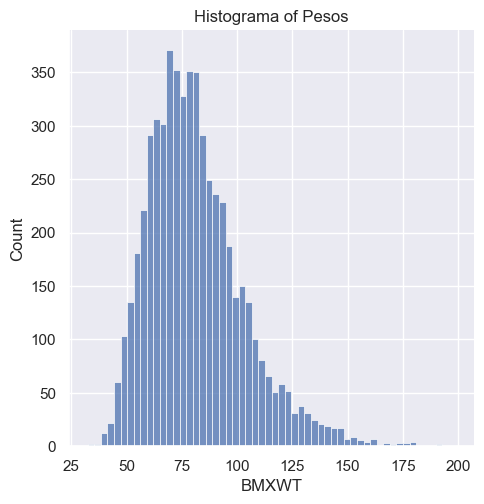

In [7]:
sns.displot(da["BMXWT"].dropna()).set(title='Histograma of Pesos')

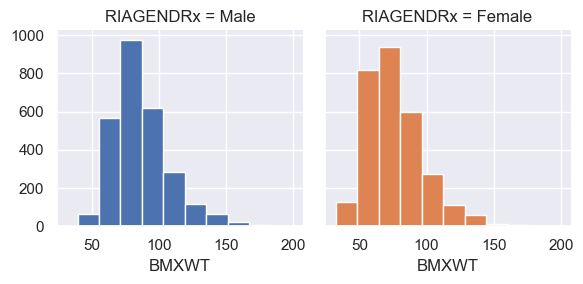

[Text(0.5, 1.0, 'Diagrama de cajas de peso según sexo')]

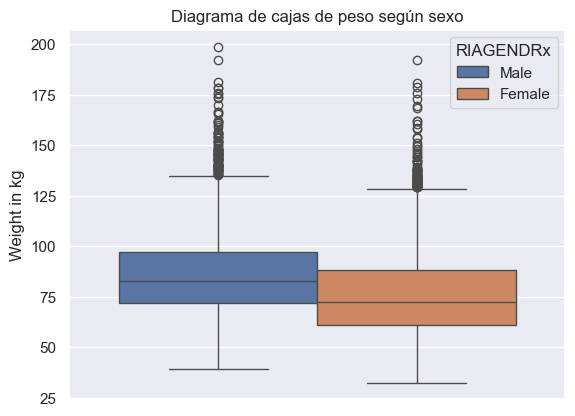

In [9]:
# Reetiqueta RIAGENDR
da["RIAGENDRx"] = da["RIAGENDR"].replace({1: "Male", 2: "Female"})

dataset_plot = sns.FacetGrid(da, col="RIAGENDRx", hue="RIAGENDRx")
dataset_plot = dataset_plot.map(plt.hist, "BMXWT")
plt.show()

dataset_box = sns.boxplot(y="BMXWT", data=da, hue="RIAGENDRx")
dataset_box.set_ylabel("Weight in kg")
dataset_box.set(title="Diagrama de cajas de peso según sexo")

Podemos construir tablas de frecuencia para el nivel educativo ([DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)) incluyendo sólo hombres, luego incluyendo sólo mujeres.

In [11]:
# Reetiqueta DMDEDUC2 y RIAGENDR
da["DMDEDUC2x"] = da["DMDEDUC2"].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some College/AA", 7: "Refused", 9: "Don't know"})
da["RIAGENDRx"] = da["RIAGENDR"].replace({1: "Male", 2: "Female"})

# Deselecciona las filas que contienen "Don't know" del dataframe
not_dk = da.loc[(da["DMDEDUC2x"] != "Don't know")]

print("Tabla de frecuencia por nivel educativo, Adultos 20+ de hombres")
print(not_dk[not_dk["RIAGENDRx"] == "Male"]["DMDEDUC2x"].value_counts(normalize=True))
print()

print("Tabla de frencuencia por nivel educativo, Adultos 20+ de mujeres")
print(not_dk[not_dk["RIAGENDRx"] == "Female"]["DMDEDUC2x"].value_counts(normalize=True))

Tabla de frecuencia por nivel educativo, Adultos 20+ de hombres
DMDEDUC2x
Some College/AA    0.271548
5.0                0.247521
HS/GED             0.229977
9-11               0.134249
<9                 0.116705
Name: proportion, dtype: float64

Tabla de frencuencia por nivel educativo, Adultos 20+ de mujeres
DMDEDUC2x
Some College/AA    0.319059
5.0                0.251667
HS/GED             0.204633
<9                 0.122499
9-11               0.102141
Name: proportion, dtype: float64


También podemos construir tablas a como se describió anteriormente, pero en esta ocasión limitamos la edad entre los 20 y los 40 años.

In [12]:
# Selecciona filas que contengan edades >=20 y <=40
age_crit = not_dk.loc[(da["RIDAGEYR"] >=20) & (da["RIDAGEYR"] <=40)]

print("Tabla de frecuencia por nivel de educación, Adultos 20-40 de hombres")
print(age_crit[age_crit["RIAGENDRx"] == "Male"]["DMDEDUC2x"].value_counts(normalize=True))
print()

print("Tabla de frecuencia por nivel de educación, Adultos 20-40 de mujeres")
print(age_crit[age_crit["RIAGENDRx"] == "Female"]["DMDEDUC2x"].value_counts(normalize=True))

Tabla de frecuencia por nivel de educación, Adultos 20-40 de hombres
DMDEDUC2x
Some College/AA    0.301075
5.0                0.254839
HS/GED             0.238710
9-11               0.133333
<9                 0.072043
Name: proportion, dtype: float64

Tabla de frecuencia por nivel de educación, Adultos 20-40 de mujeres
DMDEDUC2x
Some College/AA    0.356378
5.0                0.296981
HS/GED             0.191821
9-11               0.083739
<9                 0.071081
Name: proportion, dtype: float64


También podemos construir tablas de frecuencia del tamaño del hogar para pesonas en cada categoría de raza/origen étnico ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)).

In [13]:
da["RIDRETH1x"] = da["RIDRETH1"].replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 4: "Non-Hispanic Black", 5: "Other Race"})
da.groupby(["RIDRETH1x"])["DMDHHSIZ"].value_counts(normalize=True).unstack()

DMDHHSIZ,1,2,3,4,5,6,7
RIDRETH1x,,,,,,,
Mexican American,0.054028,0.191552,0.177800,0.181729,0.151277,0.120825,0.122790
Non-Hispanic Black,0.171149,0.248574,0.181744,0.147514,0.116544,0.061940,0.072535
Non-Hispanic White,0.194127,0.361066,0.159869,0.133225,0.091898,0.037520,0.022295
Other Hispanic,0.090667,0.214667,0.188000,0.208000,0.153333,0.085333,0.060000
Other Race,0.088790,0.245283,0.219756,0.187569,0.130966,0.052164,0.075472


Los blancos no hispanos tienen la mayor proporción de hogares de 2 personas de todas las demás categorías de raza/origen hispano. Note cómo las proporciones para las categorías mexicano-americanos y otros hispanos no varían tanto entre los tamaños de hogar de 2 a 4 en comparación con otras categorías de raza/origen hispano.

Podemos construir una tabla estratificada por una combinación de raza/origen hispano ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) y género ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), para ver cualquier diferencia en las medias de edad ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), peso ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)) y las primeras medidas de presión arterial sistólica ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1)).

In [14]:
da.groupby(["RIDRETH1x", "RIAGENDRx"])[["RIDAGEYR", "BMXWT", "BPXSY1"]].mean().unstack()

RIDAGEYR                 BMXWT                 BPXSY1  \
RIAGENDRx              Female       Male     Female       Male      Female   
RIDRETH1x                                                                    
Mexican American    46.173112  46.395789  77.350000  86.079095  121.905697   
Non-Hispanic Black  46.287250  47.144097  83.896734  89.095760  125.786311   
Non-Hispanic White  50.898901  52.404736  77.221397  90.093333  123.122685   
Other Hispanic      48.971963  48.298137  74.429176  85.954206  125.071605   
Other Race          44.479730  43.586433  65.314286  77.256291  119.826303   

                                
RIAGENDRx                 Male  
RIDRETH1x                       
Mexican American    126.926407  
Non-Hispanic Black  131.007463  
Non-Hispanic White  126.242152  
Other Hispanic      127.132686  
Other Race          123.488152

A través de las categorías de raza/origen hispano, la media más alta de edad corresponde a los blancos no hispanos; la media más alta de peso corresponde tanto a los blancos no hispanos como a los negros no hispanos; la media más alta de la primera medición de presión arterial sistólica corresponde a los negros no hispanos.

Podemos ver una diferencia notable entre hombres y mujeres para las medias de la variable peso (los blancos no hispanos presentan la mayor diferencia con 13.1 kg) y las mediciones de presión arterial sistólica (los negros no hispanos presentan la mayor diferencia con 5.2). No se observa una diferencia particularmente notable para la variable de edad entre las categorías de raza/origen hispano.

Podemos construir diagramas de dispersión para comparar la distribución de altura y peso por categorías de raza/origen hispano (columnas) y género (filas).

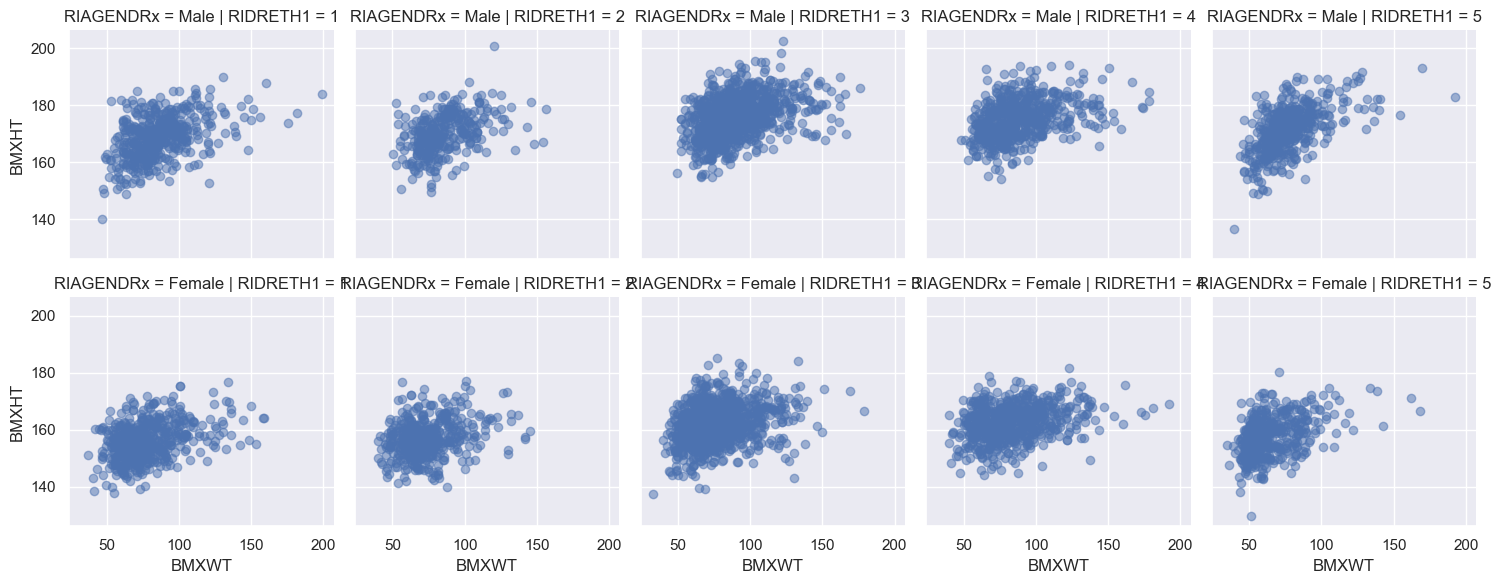

In [15]:
sns.FacetGrid(da, col="RIDRETH1", row="RIAGENDRx").map(plt.scatter, "BMXWT", "BMXHT", alpha=0.5).add_legend()

Hay una diferencia en las distribuciones de peso y altura entre hombres y mujeres en las categorías de raza/origen hispano, sin diferencias notables entre cada categoría de raza/origen hispano. Podemos observar cómo los blancos no hispanos y los negros no hispanos tienen una varianza de peso más alta que otras categorías de raza/origen hispano.

Podemos crear diagramas de violín para comparar la distribución de edades dentro de los grupos de estado civil y género.

<Axes: xlabel='DMDMARTLx', ylabel='RIDAGEYR'>

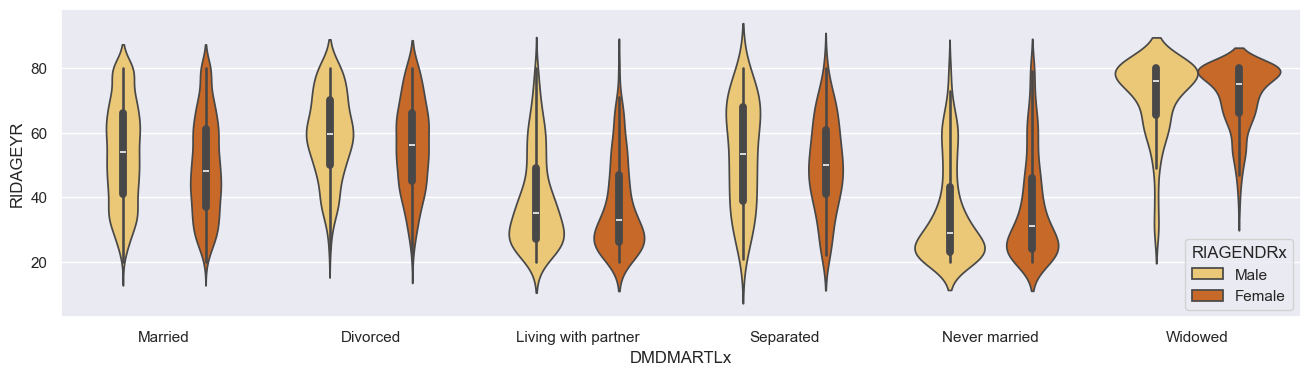

In [18]:
# Reetiqueta DMDMARTL
da["DMDMARTLx"] = da["DMDMARTL"].replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 
                                          6: "Living with partner", 77: "Refused", 99: "Don't know"})

# Deselecciona las filas que contengan "Don't know" and "Refused" del dataframe
criteria = da.loc[(da["DMDEDUC2x"] != "Don't know" ) & (da["DMDMARTLx"] != "Refused")]

plt.figure(figsize=(16, 4))
sns.violinplot(criteria, x="DMDMARTLx", y="RIDAGEYR", hue="RIAGENDRx", palette="YlOrBr")

El estado civil de nunca casados, seguido por el estado de viviendo con la pareja, tienen la media de edad más baja. El grupo de estado civil viudo tiene la media de edad más alta.

Podemos crear diagramas de violín para comparar la distribución de las primeras mediciones de presión arterial sistólica dentro de una serie de rangos de edad de 10 años, estratificados por género.

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

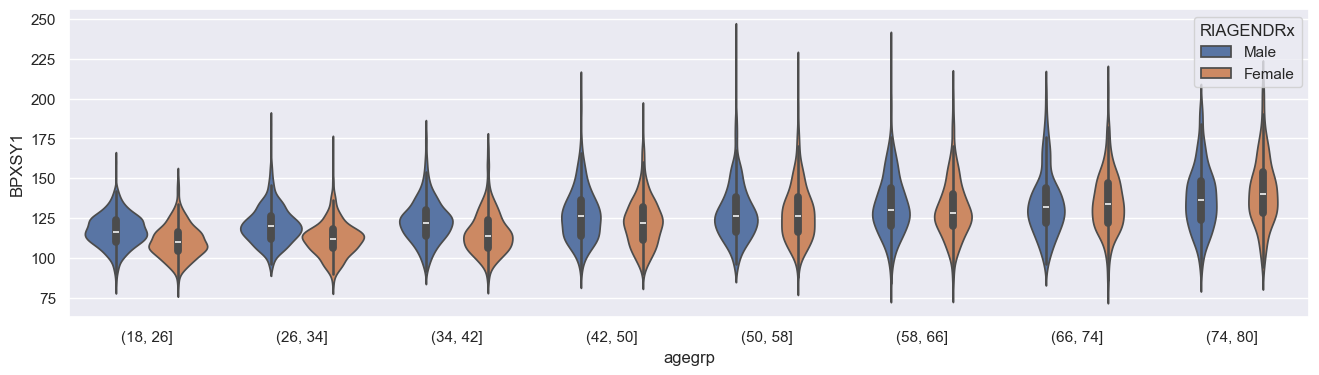

In [17]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 26, 34, 42, 50, 58, 66, 74, 80])
plt.figure(figsize=(16, 4))
sns.violinplot(da, x="agegrp", y="BPXSY1", hue="RIAGENDRx")

A través de las franjas de edad de 10 años hay una tendencia ascendente en las medias de las primeras mediciones de presión arterial sistólica a medida que aumenta la edad, con una varianza más alta también.

Los hombres tienen mediciones promedio más altas de la primera presión arterial sistólica que las mujeres en el espectro inferior de edad, pero la diferencia se reduce a medida que aumenta la edad, con una inversión de esta proporción en la última franja de edad.